In [28]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [29]:
# import numpy library
import numpy as np

# numpy array
array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2x3 array
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


- We looked at numpy array.
- Now examine how we implement tensor(pytorch array)
- import pytorch library with import torch
- We create tensor with torch.Tensor() method
- type: type of the array. In this example it is tensor
- shape: shape of the array. Row x Column

In [30]:
# import pytorch library
import torch

# pytorch array
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x0000028836539940>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


- Allocation is one of the most used technique in coding. Therefore lets learn how to make it with pytorch.
- In order to learn, compare numpy and tensor
    - np.ones() = torch.ones()
    - np.random.rand() = torch.rand()

In [31]:
# numpy ones
print("Numpy {}\n".format(np.ones((2,3))))

# pytorch ones
print(torch.ones((2,3)))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [32]:
# numpy random
print("Numpy {}\n".format(np.random.rand(2,3)))

# pytorch random
print(torch.rand(2,3))

Numpy [[0.75133837 0.33643941 0.8254781 ]
 [0.83462785 0.37204041 0.78399262]]

tensor([[0.2030, 0.8555, 0.1530],
        [0.4989, 0.5521, 0.4910]])


- Even if when I use pytorch for neural networks, I feel better if I use numpy. Therefore, usually convert result of neural network that is tensor to numpy array to visualize or examine.
- Lets look at conversion between tensor and numpy arrays.
    - torch.from_numpy(): from numpy to tensor
    - numpy(): from tensor to numpy

In [33]:
# random numpy array
array = np.random.rand(2,2)
print("{} {}\n".format(type(array),array))

# from numpy to tensor
from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

# from tensor to numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.98542944 0.24135961]
 [0.34015155 0.65341918]]

tensor([[0.9854, 0.2414],
        [0.3402, 0.6534]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.98542944 0.24135961]
 [0.34015155 0.65341918]]



In [34]:
# create tensor 
tensor = torch.ones(3,3)
print("\n",tensor)

# Resize
print("{}{}\n".format(tensor.view(9).shape,tensor.view(9)))

# Addition
print("→ Addition: {}\n".format(torch.add(tensor,tensor)))

# Subtraction
print("→ Subtraction: {}\n".format(tensor.sub(tensor)))

# Element wise multiplication
print("→ Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))

# Element wise division
print("→ Element wise division: {}\n".format(torch.div(tensor,tensor)))

# Mean
tensor = torch.Tensor([1,2,3,4,5])
print("→ Mean: {}".format(tensor.mean()))

# Standart deviation (std)
print("→ std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

→ Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

→ Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

→ Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

→ Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

→ Mean: 3.0
→ std: 1.5811388492584229


In [35]:
# import variable from pytorch library
from torch.autograd import Variable

# define variable
var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

- Assume we have equation y = x^2
- Define x = [2,4] variable
- After calculation we find that y = [4,16] (y = x^2)
- Recap o equation is that o = (1/2)*sum(y) = (1/2)*sum(x^2)
- deriavative of o = x
- Result is equal to x so gradients are [2,4]
- Lets implement

In [36]:
# lets make basic backward propagation
# we have an equation that is y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(" y =  ",y)

# recap o equation o = 1/2*sum(y)
o = (1/2)*sum(y)
print(" o =  ",o)

# backward
o.backward() # calculates gradients

# As I defined, variables accumulates gradients. In this part there is only one variable x.
# Therefore variable x should be have gradients
# Lets look at gradients with x.grad
print("gradients: ",x.grad)

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =   tensor(10., grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.])


In [37]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

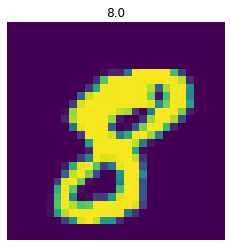

In [38]:

# Prepare Dataset
# load data
train = pd.read_csv(r".\\train.csv",dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

### Artificial Neural Network (ANN)
- **Steps of ANN:**
    1. Import Libraries
        - In order to show you, I import again but we actually imported them at previous parts.
    1. Prepare Dataset
        - Totally same with previous part(logistic regression).
        - We use same dataset so we only need train_loader and test_loader. 
        - We use same batch size, epoch and iteration numbers.
    1. Create ANN Model
        - We add 3 hidden layers.
        - We use ReLU, Tanh and ELU activation functions for diversity.
    1. Instantiate Model Class
        - input_dim = 28*28 # size of image px*px
        - output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9
        - Hidden layer dimension is 150. I only choose it as 150 there is no reason. Actually hidden layer dimension is hyperparameter and it should be chosen and tuned. You can try different values for hidden layer dimension and observe the results.
        - create model
    1. Instantiate Loss
        - Cross entropy loss
        - It also has softmax(logistic function) in it.
    1. Instantiate Optimizer
        - SGD Optimizer
    1. Traning the Model
    1. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy is increasing and our model is learning(training). 

In [39]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [40]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [41]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('[*] → Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

[*] → Iteration: 500  Loss: 0.8184572458267212  Accuracy: 75.77381134033203 %
[*] → Iteration: 1000  Loss: 0.5047561526298523  Accuracy: 86.52381134033203 %
[*] → Iteration: 1500  Loss: 0.25128933787345886  Accuracy: 89.41666412353516 %
[*] → Iteration: 2000  Loss: 0.29893946647644043  Accuracy: 90.5 %
[*] → Iteration: 2500  Loss: 0.3063642978668213  Accuracy: 91.88095092773438 %
[*] → Iteration: 3000  Loss: 0.1328737735748291  Accuracy: 92.48809814453125 %
[*] → Iteration: 3500  Loss: 0.24248959124088287  Accuracy: 93.05952453613281 %
[*] → Iteration: 4000  Loss: 0.065064437687397  Accuracy: 93.78571319580078 %
[*] → Iteration: 4500  Loss: 0.3031429946422577  Accuracy: 94.25 %
[*] → Iteration: 5000  Loss: 0.10985998064279556  Accuracy: 94.67857360839844 %
[*] → Iteration: 5500  Loss: 0.20767541229724884  Accuracy: 94.5952377319336 %
[*] → Iteration: 6000  Loss: 0.19026878476142883  Accuracy: 94.94047546386719 %
[*] → Iteration: 6500  Loss: 0.09154100716114044  Accuracy: 95.36904907226

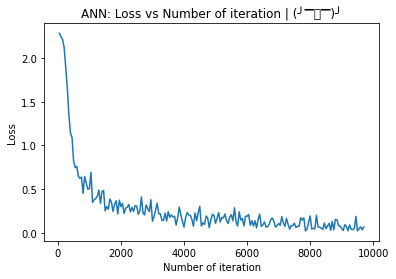

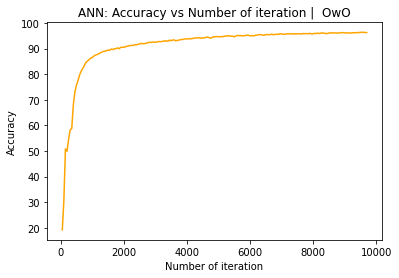

In [42]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Loss vs Number of iteration (ANN)")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "orange")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of iteration (ANN)")
plt.show()